In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


plt.style.use('seaborn')


In [29]:


full_set = pd.read_csv('data/kc_house_data.csv')

full_set['waterfront'] = full_set['waterfront'].fillna(value='NO')

#pricey = full_set.loc[full_set.price > 1e6].index

#full_set = full_set.drop(pricey)

X_train, X_test, y_train, y_test = train_test_split( full_set.drop(columns = 'price' , axis = 1) , full_set['price'] , test_size=0.2) #, random_state = 123456789)

training_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

display(training_data)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
18727,7349650230,3/2/2015,3,2.25,1620,6000,1.0,NO,NONE,Average,...,1280,340.0,1998,0.0,98002,47.2835,-122.200,1710,6318,247500.0
866,3955900830,4/27/2015,3,2.50,3460,6590,2.0,NO,NONE,Average,...,3460,0.0,2001,0.0,98056,47.4802,-122.188,2490,6312,467000.0
6183,7308600050,9/9/2014,5,2.75,3360,9200,2.0,NO,NONE,Average,...,3360,0.0,2014,0.0,98011,47.7754,-122.173,3360,9713,738515.0
168,3261020370,6/5/2014,3,2.50,2680,9750,1.0,NO,NONE,Good,...,1610,1070.0,1979,0.0,98034,47.7028,-122.231,2480,8750,653000.0
18930,5249802240,5/15/2014,4,2.50,2240,7200,2.0,NO,NONE,Average,...,2240,0.0,1995,NaN,98118,47.5636,-122.275,1860,6600,497000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,9550200225,7/11/2014,3,1.50,1230,3060,1.0,NO,NONE,Average,...,910,320.0,1927,0.0,98103,47.6670,-122.333,1260,4488,625000.0
4352,4232900940,5/22/2014,3,1.50,1660,4800,2.0,NO,NONE,Average,...,1660,0.0,1907,0.0,98119,47.6352,-122.358,1690,4000,926300.0
7664,3904902430,4/3/2015,3,2.50,2440,10363,2.0,NO,NONE,Average,...,2440,0.0,1988,0.0,98029,47.5634,-122.016,2500,10728,620000.0
11487,986000045,10/7/2014,4,1.75,2020,10332,1.0,NO,NONE,Average,...,1010,1010.0,1954,0.0,98168,47.5059,-122.303,2240,8379,240000.0


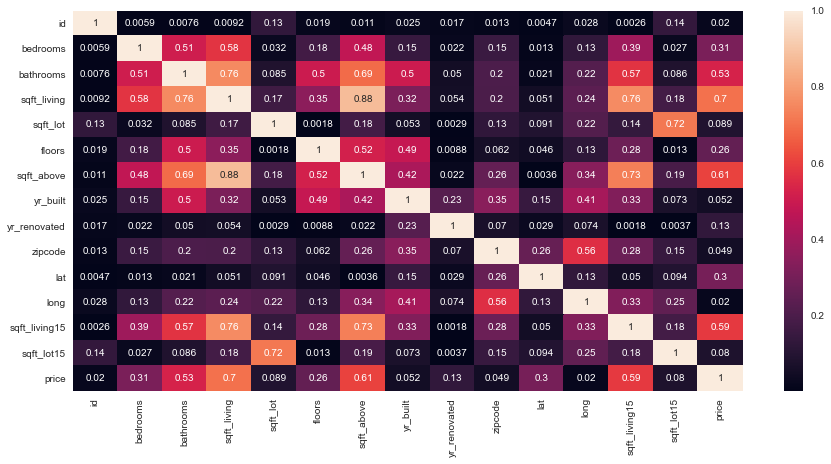

In [3]:
fig, ax = plt.subplots(figsize = (15,7))
sns.heatmap(training_data.corr().abs(), annot = True, ax = ax);

<AxesSubplot:>

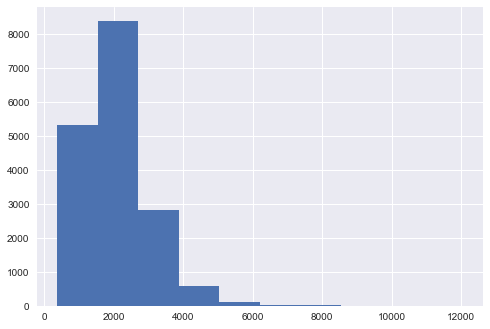

In [4]:
training_data['sqft_living'].hist()

<AxesSubplot:>

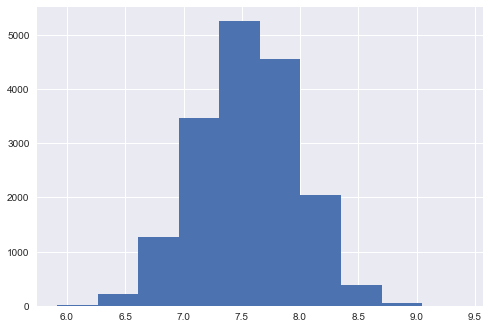

In [5]:
np.log(training_data['sqft_living']).hist()

<AxesSubplot:>

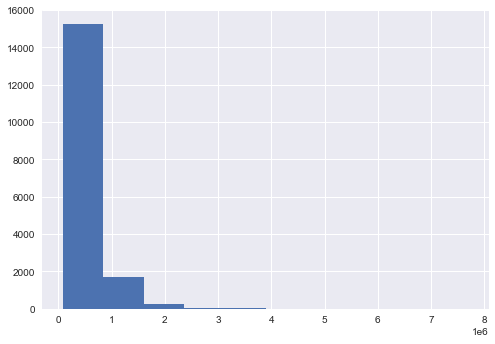

In [6]:
training_data['price'].hist()

<AxesSubplot:>

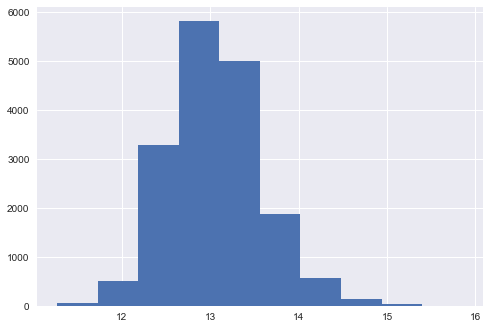

In [7]:
np.log(training_data['price']).hist()

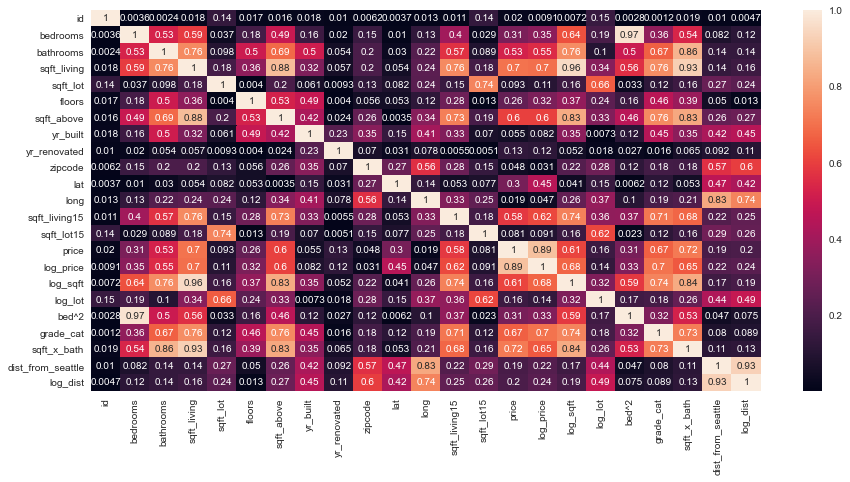

In [73]:
feature_testing = training_data.copy()

fig,ax = plt.subplots(figsize = (15,7))

def custom_transformations(df):
    df['grade_cat'] = df['grade'].str.split().str[0].astype(int)
    df['dist_from_seattle'] = np.sqrt( (df['lat'] - 47.6050) ** 2 + (df['long'] + 122.3344) ** 2)
    df['log_sqft'] = np.log(df['sqft_living'])
    df['log_dist'] = np.log(df['dist_from_seattle'])
#log X,y
feature_testing['log_price'] = np.log(feature_testing['price'])
feature_testing['log_sqft'] = np.log(feature_testing['sqft_living'])
feature_testing['log_lot'] = np.log(feature_testing['sqft_lot'])


feature_testing['bed^2'] = feature_testing['bedrooms'] ** 2
feature_testing['grade_cat'] = feature_testing['grade'].str.split().str[0].astype(int)


feature_testing['sqft_x_bath'] = feature_testing['sqft_living'] * feature_testing['bathrooms']

feature_testing['dist_from_seattle'] = np.sqrt( (feature_testing['lat'] - 47.6050) ** 2 + (feature_testing['long'] + 122.3344) ** 2)
feature_testing['log_dist'] = np.log(feature_testing['dist_from_seattle'])

ax = sns.heatmap(feature_testing.corr().abs(), annot = True, ax = ax);

In [9]:
pairs_df = feature_testing.drop(columns = 'price', axis = 1).corr().abs().stack().reset_index().sort_values(0, ascending = False)
pairs_df['Pairs'] = list(zip(pairs_df.level_0, pairs_df.level_1))
pairs_df.set_index(['Pairs'], inplace = True)
pairs_df.drop(columns = ['level_0', 'level_1'], inplace = True)
pairs_df.columns = ['CC']
pairs_df.drop_duplicates(inplace = True)
pairs_df[(pairs_df.CC > 0.6) & (pairs_df.CC < 1)]

,CC
Pairs,
"(log_sqft, sqft_living)",0.955784
"(sqft_living, sqft_x_bath)",0.927612
"(sqft_above, sqft_living)",0.875777
"(sqft_x_bath, bathrooms)",0.856446
"(log_sqft, sqft_x_bath)",0.833017
"(sqft_above, log_sqft)",0.832115
"(dist_from_seattle, long)",0.829351
"(sqft_x_bath, sqft_above)",0.825092
"(bed^2, bedrooms)",0.787141


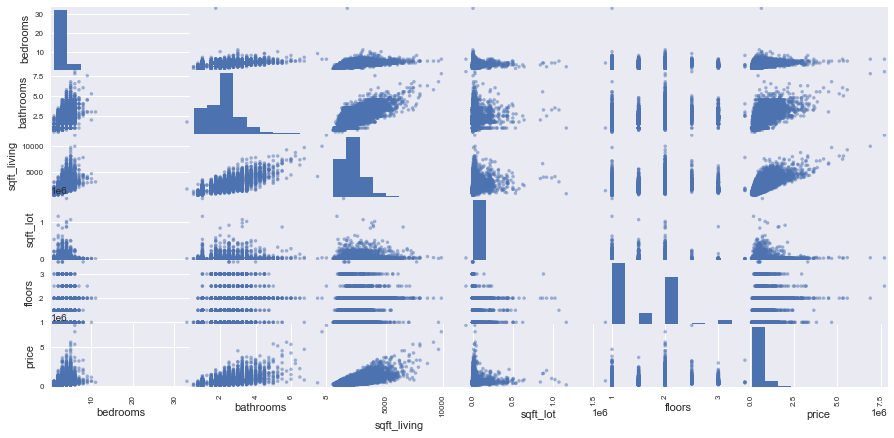

In [10]:
pd.plotting.scatter_matrix(feature_testing[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']], figsize = (15,7));

# Baseline

In [11]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

dummy_regr = DummyRegressor(strategy="mean")

X = training_data['bathrooms'].values.reshape(-1,1)
y = y_train

dummy_regr.fit(X, y)
print(dummy_regr.score(X, y))

predicted_y = dummy_regr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.0
364864.6923866816


# Sqft only

In [12]:
X = training_data['sqft_living'].values.reshape(-1,1)
y = y_train

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.49464693462006837
259375.70310612107


In [13]:
import statsmodels.api as sm

X = training_data['sqft_living'].values.reshape(-1,1)
y = y_train

results = sm.OLS(y, sm.add_constant(X)).fit()

results.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.691e+04
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:56:41   Log-Likelihood:            -2.3989e+05
No. Observations:               17277   AIC:                         4.798e+05
Df Residuals:                   17275   BIC:                         4.798e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.438e+04   4899.742     -9.057      0.000    -5.4e+04   -3.48e+04
x1           280.5815      2.158    130.035      0.000     276.352     284.811
==============================================================================
Omnibus:                    11874.965   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           430943.566
Skew:                           2.833   Prob(JB):                         0.00
Kurtosis:                      26.802   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
X = training_data[['sqft_living','bathrooms']]
y = y_train

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.49470559255559465
259360.6493883987


# Log sqft (worse)

In [15]:
X = feature_testing['log_sqft'].values.reshape(-1,1)
y = feature_testing['price']

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.3756359994751405
288304.06539427204


# Log price (worse)

In [16]:
X = feature_testing['sqft_living'].values.reshape(-1,1)
y = feature_testing['log_price']

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.4871263331456014
0.3758339237638707


# Log sqft log price (worse)

In [17]:
X = feature_testing['log_sqft'].values.reshape(-1,1)
y = feature_testing['log_price']

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.4580689816207355
0.386333867947179


# Sqft X Bath (better)

In [18]:
X = feature_testing['sqft_x_bath'].values.reshape(-1,1)
y = y_train

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)

print(np.linalg.cond(X))

0.5114333380446457
255031.4579180407
1.0


# Bed ^2 (worse)

In [19]:
from sklearn.preprocessing import PolynomialFeatures

X = feature_testing['bedrooms'].values.reshape(-1,1)
y = feature_testing['price']

poly = PolynomialFeatures(2)
poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.09677116339277292
346761.39096587594


# sqft X bath + log_lot (slightly better)

In [20]:
X = feature_testing[['sqft_x_bath','log_lot']]
y = y_train



lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.512136755643888
254847.8000396046


# Polynomial

In [21]:
X = feature_testing[['sqft_x_bath','log_lot']]
y = y_train

new_x = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(new_x, y)

print(lr.score(new_x,y))

predicted_y = lr.predict(new_x)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)

0.5148612959941634
254135.18717849298


# Distance from seattle added to polynomial

R^2:  0.6391463372817993
Adjusted R^2 : 0.6389373406046777
RMSE:  223686.4982114833
Median Error:  17952.87516604364


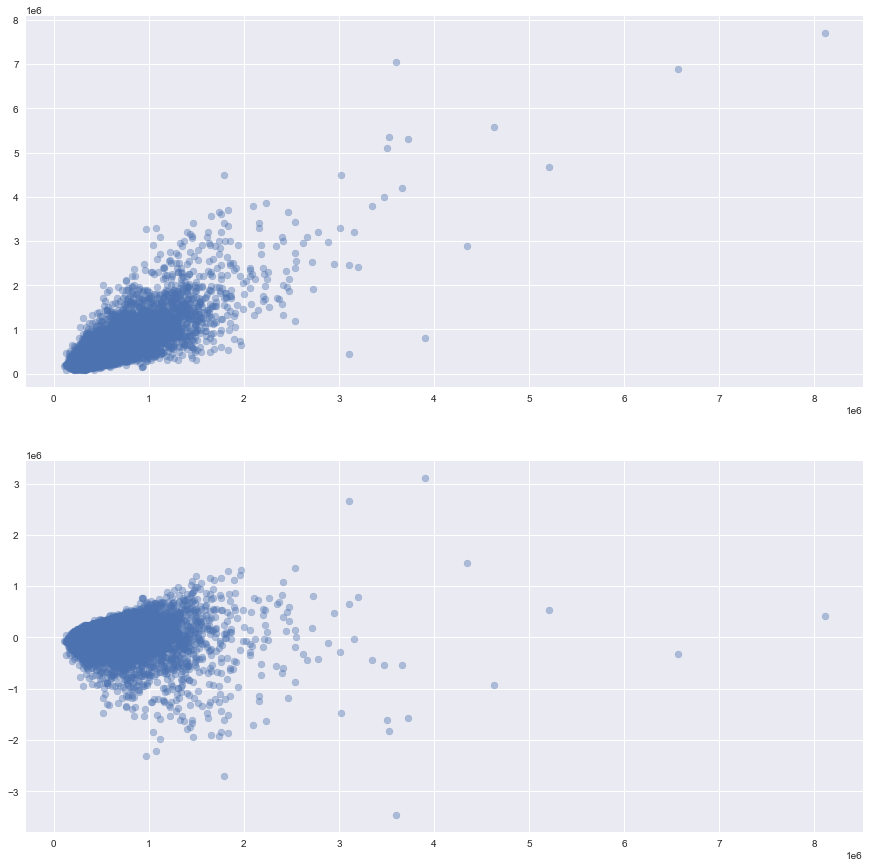

In [37]:
X = feature_testing[['sqft_x_bath','dist_from_seattle','yr_built']]
y = y_train

poly = PolynomialFeatures(2)
X = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

print('R^2: ',lr.score(X,y))
print('Adjusted R^2 :', 1 - ( 1-lr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))
predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print('RMSE: ',rmse)
print("Median Error: ", np.median(predicted_y - y))

#print(np.linalg.cond(X))

fig, axs = plt.subplots(2, figsize = (15,15));

axs[0].scatter(predicted_y, y, alpha = 0.4)
axs[1].scatter(predicted_y, predicted_y - y, alpha = 0.4);
#ax.hlines(xmin = min(predicted_y), xmax = max(predicted_y), y = 0, color = 'r')
#ax.plot(np.linspace(0,6e6, 17277), predicted_y)

# Tried OHE with waterfront

In [23]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop = 'first', sparse = False)
cat_X = ohe.fit_transform(feature_testing['waterfront'].values.reshape(-1,1))
cat_df = pd.DataFrame(data = cat_X)
X = feature_testing[['sqft_x_bath','dist_from_seattle','yr_built']].copy()
X['waterfront'] = cat_df.values
y = y_train



#poly = PolynomialFeatures(3)
#X = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)

0.6260275321332432
223126.75750160243


# Ordinal Encoder

In [24]:
from sklearn.preprocessing import OrdinalEncoder

x_enc = feature_testing['grade']

x_enc = x_enc.str.split().str[0]

enc = OrdinalEncoder()

test = enc.fit_transform(X)


R^2:  0.7079883474110107
Adjusted R^2 : 0.7070387160204774
RMSE:  0.28468539901228274
Median Error:  -0.005610103153570023
Condition Number:  3924214014089792.0
RMSE $: 98677.11940504673


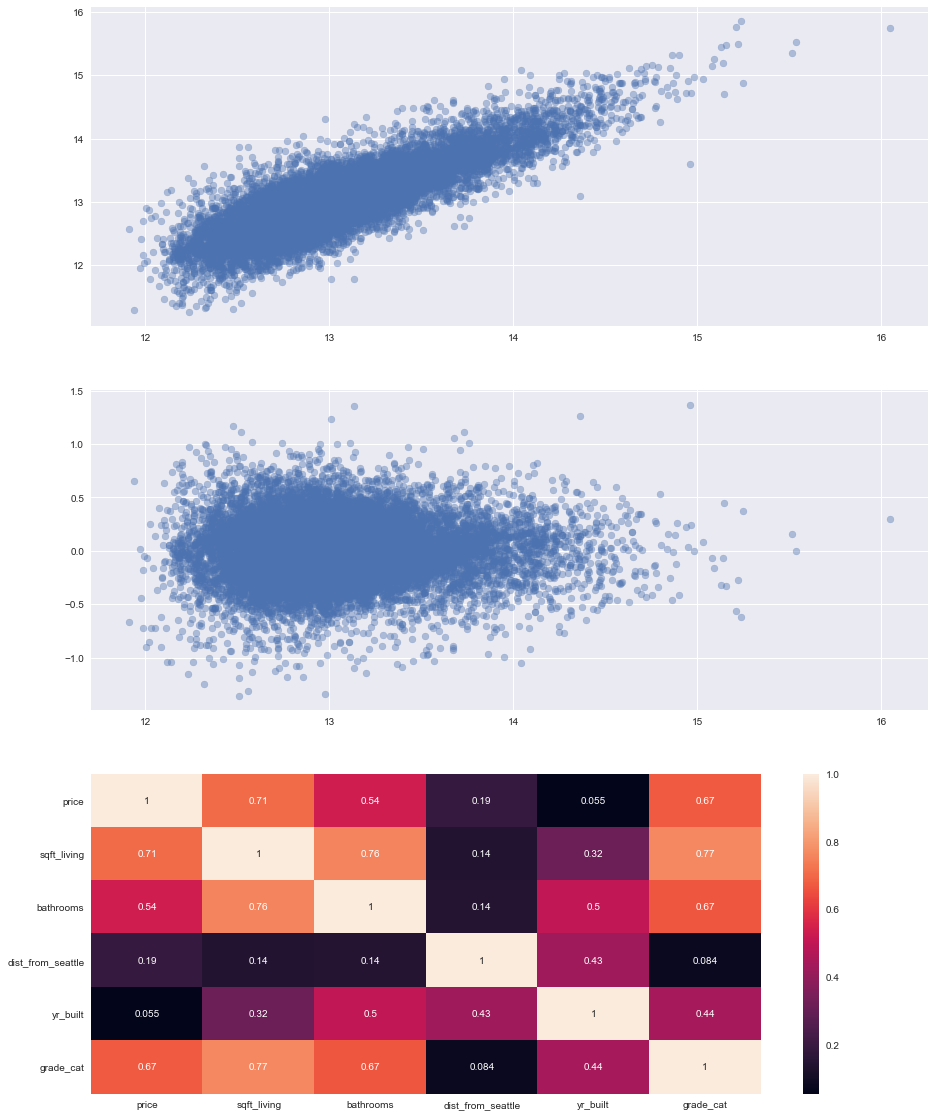

In [74]:
X = feature_testing[['log_sqft','bathrooms','log_dist','yr_built','grade_cat']]

y = np.log(y_train)

poly = PolynomialFeatures(3)
X = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

print('R^2: ',lr.score(X,y))
print('Adjusted R^2 :', 1 - ( 1-lr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print('RMSE: ',rmse)
print("Median Error: ", np.median(predicted_y - y))

print('Condition Number: ',np.linalg.cond(X))

fig, axs = plt.subplots(3, figsize = (15,20));

axs[0].scatter(predicted_y, y, alpha = 0.4)
axs[1].scatter(predicted_y, predicted_y - y, alpha = 0.4);
sns.heatmap(pd.concat([y_train, X_pre], axis = 1).corr().abs(), annot = True, ax = axs[2]);
#ax.hlines(xmin = min(predicted_y), xmax = max(predicted_y), y = 0, color = 'r')
#ax.plot(np.linspace(0,6e6, 17277), predicted_y)

print('RMSE $:', y_test.std()*rmse)

# Cross-Validations

In [48]:


scores = cross_val_score(lr, X, y, scoring = 'neg_mean_squared_error', cv = 10)
lr_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())
    
display_scores(lr_scores)

Scores: [196223.13134085 182348.72181716 194475.92644098 190175.12250277
 184120.36870048 171973.15871435 189559.59915338 184355.05180258
 203370.75730533 188785.59736706]
Mean: 188538.74351449285
Standard Deviation: 8172.08474279833


# Test Predictions

In [75]:
custom_transformations(test_data)

In [81]:
X_test_data = test_data[['log_sqft','bathrooms','log_dist','yr_built','grade_cat']]
y_test_data = np.log(y_test)

poly = PolynomialFeatures(3)
X_test_data = poly.fit_transform(X_test_data)

test_predictions = lr.predict(X_test_data)
print('Adjusted R^2 :', 1 - ( 1-lr.score(X_test_data, y_test_data) ) * ( len(y_test_data) - 1 ) / ( len(y_test_data) - X_test_data.shape[1] - 1 ))
rmse = np.sqrt(mean_squared_error(test_predictions,y_test_data))
print('RMSE: ',rmse)
print("Median Error: ", np.median(test_predictions - y_test_data))
print('RMSE $:', y_test.std()*rmse)

Adjusted R^2 : 0.6970388678273425
RMSE:  0.28731105448564426
Median Error:  -0.0075144529341457655
RMSE $: 99587.21918382125


<AxesSubplot:xlabel='yr_built', ylabel='price'>

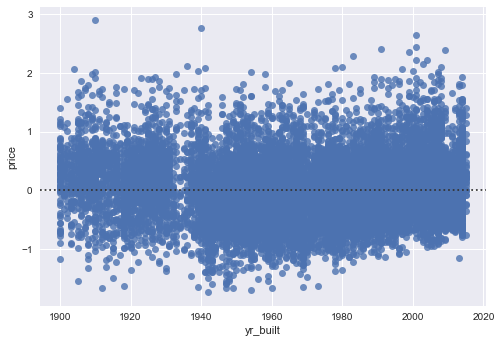

In [79]:
sns.residplot(x=feature_testing['yr_built'], y=np.log(feature_testing['price']))

<AxesSubplot:xlabel='dist_from_seattle', ylabel='price'>

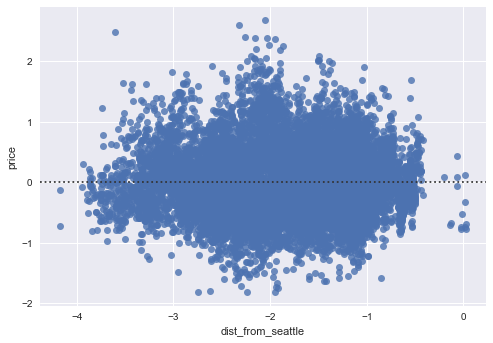

In [71]:
sns.residplot(x=np.log(feature_testing['dist_from_seattle']), y=np.log(feature_testing['price']))